In [13]:
import numpy as np
import recombination as rb

# the running time of the notebook could be quite long (about 1 hour). 
# it is suggested to try with a sample value of 10 to experiment.

n = [20]
sample = 70

In [14]:
N = np.linspace(2*n[0],1000,10)
N = np.append(N,np.geomspace(1200,500000,30))
N = np.append(N,1000000)
N = N.astype(int)
print(N)

t_basic = np.zeros([len(n), len(N), sample])
ERR_basic = np.zeros([len(n), len(N), sample])
iterations_basic = np.zeros([len(n), len(N), sample])

t_opt = np.zeros([len(n), len(N), sample])
ERR_opt = np.zeros([len(n), len(N), sample])
iterations_opt = np.zeros([len(n), len(N), sample])

t_opt_reset = np.zeros([len(n), len(N), sample])
ERR_opt_reset = np.zeros([len(n), len(N), sample])
iterations_opt_reset = np.zeros([len(n), len(N), sample])

t_opt_log_reset = np.zeros([len(n), len(N), sample])
ERR_opt_log_reset = np.zeros([len(n), len(N), sample])
iterations_opt = np.zeros([len(n), len(N), sample])

[     40     146     253     360     466     573     680     786     893
    1000    1199    1477    1819    2239    2757    3395    4180    5146
    6336    7802    9606   11827   14562   17929   22075   27179   33464
   41202   50729   62458   76901   94682  116575  143530  176718  217580
  267890  329833  406099  499999 1000000]


In [15]:
# comment/uncomment if you want to try the symmetric/non symmeric case

for i in range(len(n)):
    max_iter = n[i]**3
    for j in range(len(N)):
        print('n =', n[i],', N =', N[j])
        for k in range(sample):
            print('sample number =', k)
            
############################################ SYMMETRIC
#             X = np.random.normal(0.,1., (N[j],n[i]))
#####################################################
    
######################################## NON SYMMETRIC
            X = np.random.exponential(1., (N[j],int(n[i]/2)))
            X = np.append(X,np.random.exponential(5., (N[j],int(n[i]/2))),axis=1)
#####################################################
            
            X = X-np.mean(X,0)
            
            print("recomb_basic")
            _, _, _, t_basic[i,j,k], ERR_basic[i,j,k], iterations_basic[i,j,k], _ = rb.recomb_basic(np.copy(X),max_iter)
            print("recomb_Mor_NOreset")
            _, _, _, t_opt[i,j,k], ERR_opt[i,j,k], iterations_opt[i,j,k], _ = rb.recomb_Mor_NOreset(np.copy(X),max_iter)
            print("recomb_Mor_reset")
            _, _, _, t_opt_reset[i,j,k], ERR_opt_reset[i,j,k], iterations_opt_reset[i,j,k], _ = rb.recomb_Mor_reset(np.copy(X),max_iter)
            print("recomb_log")
            _, _, _, t_opt_log_reset[i,j,k], ERR_opt_log_reset[i,j,k], _, _ = rb.recomb_log(np.copy(X),max_iter)


n = 20 , N = 40
sample number = 0
recomb_basic
recomb_Mor_NOreset
recomb_Mor_reset
recomb_log
sample number = 1
recomb_basic
recomb_Mor_NOreset
Recombination procedure iteration =  200
recomb_Mor_reset
recomb_log
sample number = 2
recomb_basic
recomb_Mor_NOreset
recomb_Mor_reset
recomb_log
sample number = 3
recomb_basic
recomb_Mor_NOreset
recomb_Mor_reset
ERROR: NO convergence
ERROR: NO convergence
ERROR: NO convergence
recomb_log
sample number = 4
recomb_basic
recomb_Mor_NOreset
Recombination procedure iteration =  200
recomb_Mor_reset
ERROR: NO convergence
ERROR: NO convergence
recomb_log
sample number = 5
recomb_basic
recomb_Mor_NOreset
recomb_Mor_reset
recomb_log
sample number = 6
recomb_basic
recomb_Mor_NOreset
recomb_Mor_reset
ERROR: NO convergence
ERROR: NO convergence
ERROR: NO convergence
recomb_log
sample number = 7
recomb_basic
recomb_Mor_NOreset
recomb_Mor_reset
ERROR: NO convergence
ERROR: NO convergence
ERROR: NO convergence
recomb_log
sample number = 8
recomb_basic
recom

In [16]:
# if one of the max_err* is not 0 it means there have been problems.
# ERR* = 2 means no solution found (using the assigne value of maximum iteration)
# although for the considered cases we have not experienced this situation, it could happen for the basic algo if max_iter is low
# ERR* = 3 means the weights do not sum up to 1 or they are not between 0 or 1
# caused by numerical error
# for the other errors read recombination.py

print("ERR_opt_log_reset = ", np.max(ERR_opt_log_reset))
print("ERR_opt_reset = ", np.max(ERR_opt_reset))
print("ERR_opt = ", np.max(ERR_opt))
print("ERR_basic = ", np.max(ERR_basic))

ERR_opt_log_reset =  0.0
ERR_opt_reset =  0.0
ERR_opt =  0.0
ERR_basic =  2.0


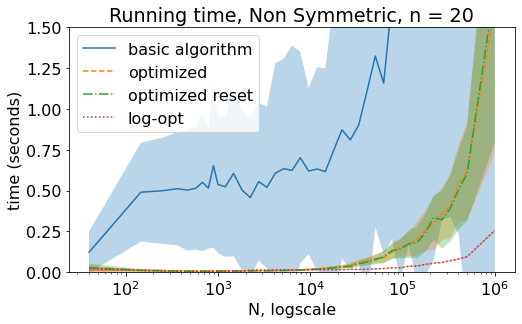

In [21]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 16})
plt.figure(figsize=(8,4.5))

x = N

plt.plot(x, np.mean(t_basic,axis=2)[0], label = "basic algorithm", linestyle='-')
plt.fill_between(x, 
                 np.mean(t_basic,axis=2)[0]-np.std(t_basic,axis=2)[0], 
                 np.mean(t_basic,axis=2)[0]+np.std(t_basic,axis=2)[0], 
                 alpha=0.3)


plt.plot(x, np.mean(t_opt,axis=2)[0], label = "optimized", linestyle='--')
plt.fill_between(x, 
                 np.mean(t_opt,axis=2)[0]-np.std(t_opt,axis=2)[0], 
                 np.mean(t_opt,axis=2)[0]+np.std(t_opt,axis=2)[0], 
                 alpha=0.3)

plt.plot(x, np.mean(t_opt_reset,axis=2)[0], label = "optimized reset", linestyle='-.')
plt.fill_between(x, 
                 np.mean(t_opt_reset,axis=2)[0]-np.std(t_opt_reset,axis=2)[0], 
                 np.mean(t_opt_reset,axis=2)[0]+np.std(t_opt_reset,axis=2)[0], 
                 alpha=0.3)

plt.plot(x, np.mean(t_opt_log_reset,axis=2)[0], label = "log-opt", linestyle=':')
plt.fill_between(x, 
                 np.mean(t_opt_log_reset,axis=2)[0]-np.std(t_opt_log_reset,axis=2)[0], 
                 np.mean(t_opt_log_reset,axis=2)[0]+np.std(t_opt_log_reset,axis=2)[0], 
                 alpha=0.3)

plt.legend() 
plt.ylim([0,1.5])
plt.xscale('log')
# Symmetric or not depending on the distirbution of the points chosen before
plt.title('Running time, Non Symmetric, n = '+str(n[0]))
plt.xlabel('N, logscale')
plt.ylabel('time (seconds)')
# plt.savefig('bVSo_std_n20_NONsymmetric_70sample_time.pdf', bbox_inches='tight')
plt.show()


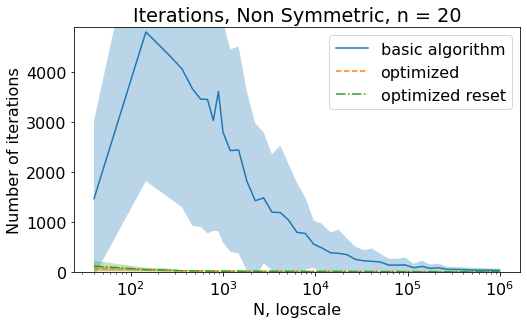

In [28]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 16})
plt.figure(figsize=(8,4.5))

x = N

plt.plot(x, np.mean(iterations_basic,axis=2)[0], label = "basic algorithm", linestyle='-')
plt.fill_between(x, 
                 np.mean(iterations_basic,axis=2)[0]-np.std(iterations_basic,axis=2)[0], 
                 np.mean(iterations_basic,axis=2)[0]+np.std(iterations_basic,axis=2)[0], 
                 alpha=0.3)


plt.plot(x, np.mean(iterations_opt,axis=2)[0], label = "optimized", linestyle='--')
plt.fill_between(x, 
                 np.mean(iterations_opt,axis=2)[0]-np.std(iterations_opt,axis=2)[0], 
                 np.mean(iterations_opt,axis=2)[0]+np.std(iterations_opt,axis=2)[0], 
                 alpha=0.3)

plt.plot(x, np.mean(iterations_opt_reset,axis=2)[0], label = "optimized reset", linestyle='-.')
plt.fill_between(x, 
                 np.mean(iterations_opt_reset,axis=2)[0]-np.std(iterations_opt_reset,axis=2)[0], 
                 np.mean(iterations_opt_reset,axis=2)[0]+np.std(iterations_opt_reset,axis=2)[0], 
                 alpha=0.3)

plt.legend() 
plt.ylim([0,4900])
plt.xscale('log')
# Symmetric or not depending on the distirbution of the points chosen before
plt.title('Iterations, Non Symmetric, n = '+str(n[0]))
plt.xlabel('N, logscale')
plt.ylabel('Number of iterations')
# plt.savefig('bVSo_std_n20_NONsymmetric_70sample_iterations.pdf', bbox_inches='tight')
plt.show()
